<a href="https://colab.research.google.com/github/Akshithaa25/Machine_Learning_502/blob/main/Lab_1_Machine_learning_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/Churn_Modelling - Churn_Modelling.csv')
df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

No missing values

In [ ]:
from sklearn.preprocessing import LabelEncoder
for col in df.columns:
  le=LabelEncoder()
  df[col]=le.fit_transform(df[col])
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,2736,1115,228,0,0,24,2,0,0,1,1,5068,1
1,1,3258,1177,217,2,0,23,1,743,0,0,1,5639,0
2,2,2104,2040,111,0,0,24,8,5793,2,1,0,5707,1
3,3,5435,289,308,0,0,21,1,0,1,0,0,4704,0
4,4,6899,1822,459,2,0,25,2,3696,0,1,1,3925,0
5,5,312,537,254,2,1,26,8,2674,1,1,0,7531,1
6,6,1058,177,431,0,1,32,7,0,1,1,1,513,0
7,7,3589,2000,8,1,0,11,4,2781,3,1,0,5978,1
8,8,9066,1146,110,0,1,26,4,4962,1,0,1,3718,0
9,9,1054,1081,293,0,1,9,2,4450,0,1,1,3550,0


In [ ]:
df = df.drop(["Surname","RowNumber"], axis=1)

In [ ]:
df.describe()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,4999.50000,259.584600,0.746300,0.545700,20.920600,5.012800,2036.788100,0.530200,0.70550,0.515100,4998.621200,0.203700
std,2886.89568,96.496107,0.827529,0.497932,10.482065,2.892174,2125.232536,0.581654,0.45584,0.499797,2886.711202,0.402769
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,2499.75000,193.000000,0.000000,0.000000,14.000000,3.000000,0.000000,0.000000,0.00000,0.000000,2498.750000,0.000000
50%,4999.50000,261.000000,0.000000,1.000000,19.000000,5.000000,1383.500000,0.000000,1.00000,1.000000,4998.500000,0.000000
75%,7499.25000,327.000000,1.000000,1.000000,26.000000,7.000000,3882.250000,1.000000,1.00000,1.000000,7498.250000,0.000000
max,9999.00000,459.000000,2.000000,1.000000,69.000000,10.000000,6381.000000,3.000000,1.00000,1.000000,9998.000000,1.000000


[]

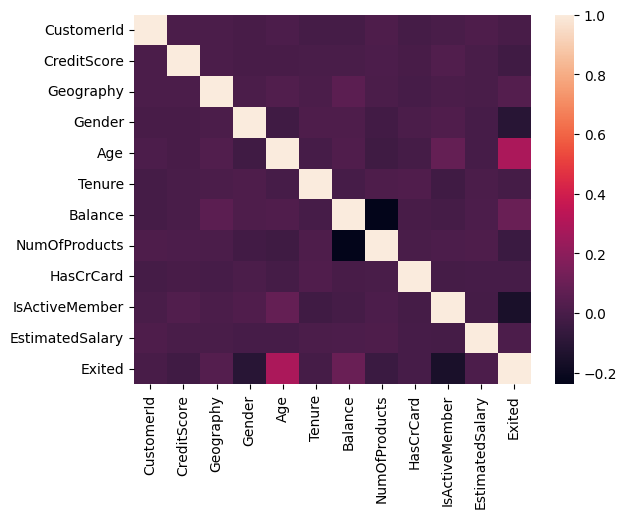

In [ ]:
# Checking For Correlation
sns.heatmap(df.corr())
plt.plot()

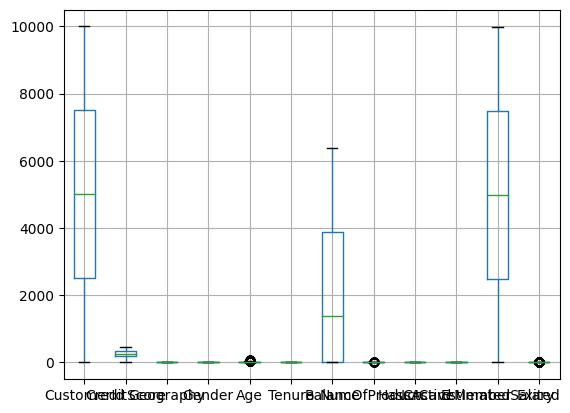

<Figure size 1000x1000 with 0 Axes>

In [ ]:
df.boxplot()
plt.figure(figsize=(10,10))
plt.show()

<Axes: >

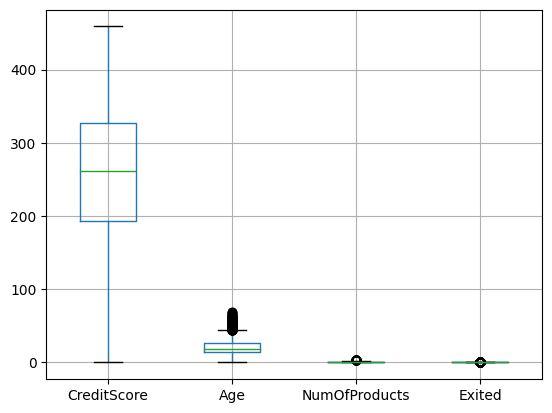

In [ ]:
# drop ,age, noofproducts, exited
df.boxplot(column=['CreditScore','Age','NumOfProducts','Exited'])

<Axes: ylabel='Age'>

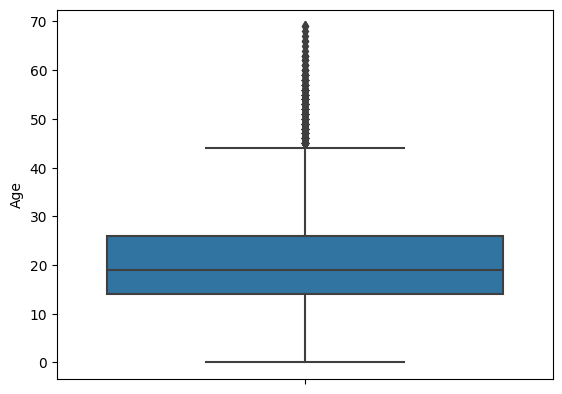

In [ ]:
sns.boxplot(y='Age', data=df)

In [ ]:
df['Age'].mean()

20.9206

In [ ]:
df1=df[df['Age']<40]

<Axes: ylabel='Age'>

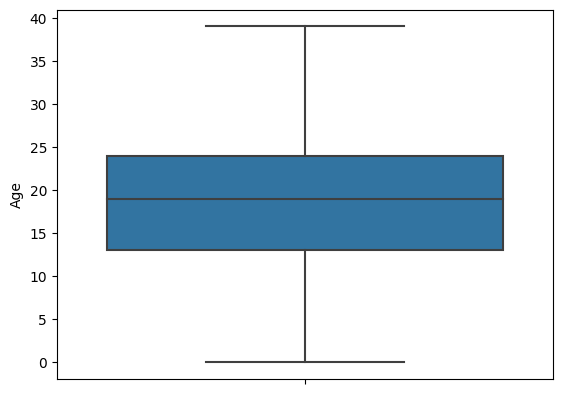

In [ ]:
sns.boxplot(y='Age', data=df1)

In [ ]:
df1['Age'].mean()

19.092455858747993

In [ ]:
df.shape

(10000, 12)

In [ ]:
df1.shape

(9345, 12)

<Axes: ylabel='NumOfProducts'>

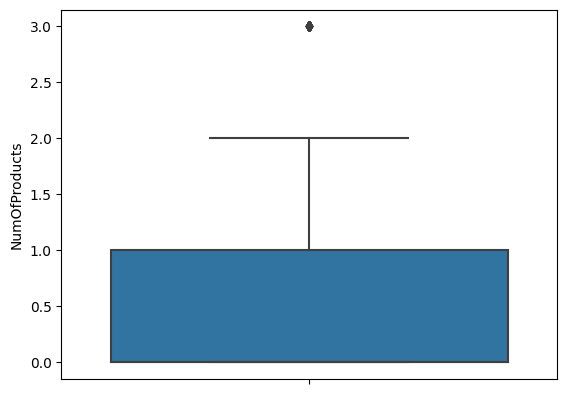

In [ ]:
sns.boxplot(y='NumOfProducts', data=df)

In [ ]:
df['NumOfProducts'].mean()

0.5302

In [ ]:
df1=df[df['NumOfProducts']<3.0]

<Axes: ylabel='NumOfProducts'>

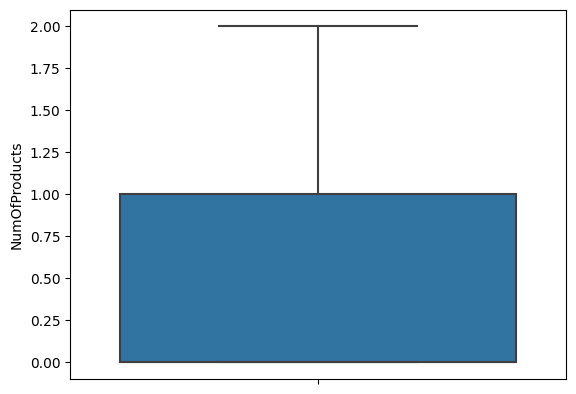

In [ ]:
sns.boxplot(y='NumOfProducts', data=df1)

0.2037

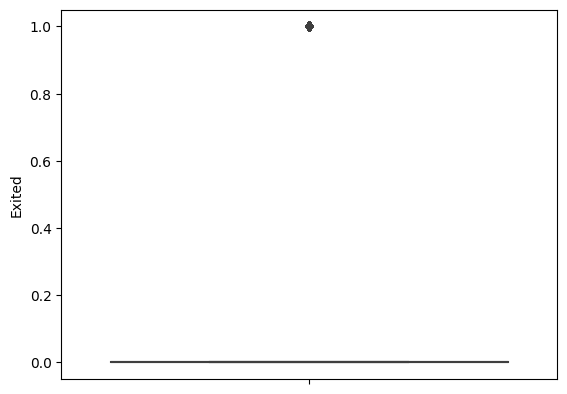

In [ ]:
sns.boxplot(y='Exited', data=df)
df['Exited'].mean()

<Axes: ylabel='Exited'>

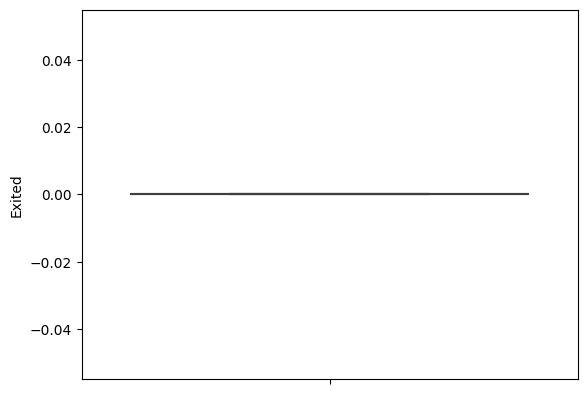

In [ ]:
df1=df[df['Exited']<1.0]
sns.boxplot(y='Exited', data=df1)

<Axes: >

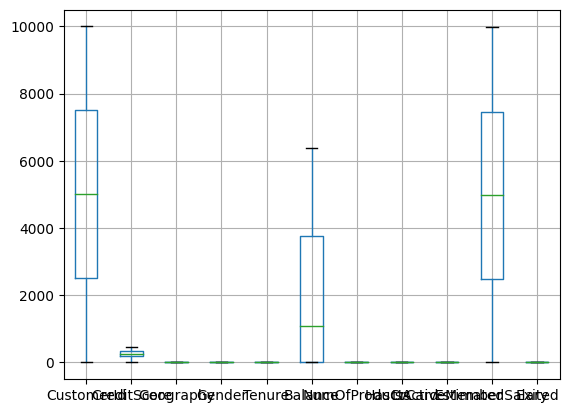

In [ ]:
df1.boxplot()